# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [1]:
import pandas as pd
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [87]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer, load_wine
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline


## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [6]:
iris = load_iris()

In [7]:
iris_df = pd.DataFrame(data= iris.data, columns = iris.feature_names)
iris_df['Target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
X,y =load_iris(return_X_y = True)
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)


In [16]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)


In [17]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
print('학습 데이터 점수 : {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.9916666666666667
평가 데이터 점수 : 0.9333333333333333


In [19]:
model = KNeighborsClassifier()
model.fit(X_train_scale,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
print('학습 데이터 점수 : {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))# scale 돌린게 오히려 성능이 안좋아졋네

학습 데이터 점수 : 0.35
평가 데이터 점수 : 0.26666666666666666


In [22]:
cross_validate(
    estimator = KNeighborsClassifier(),
    X=X, y=y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)
# 1, 0.9 0.96 매우 좋게 나오네

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.4s finished


{'fit_time': array([0.00192285, 0.00179839, 0.00128865, 0.00082779, 0.00081539]),
 'score_time': array([0.00380659, 0.00254917, 0.00328064, 0.00289392, 0.00309277]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [25]:
param_grid = [{'n_neighbors' : [3,5,7],
               'weights' : ['uniform','distance'],
               'algorithm' : ['ball_tree', 'kd_tree','brute']}]

In [26]:
gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs= multiprocessing.cpu_count(),
    verbose = True
)

In [28]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [29]:
gs.best_estimator_# 전체 파라미터에 따라서 좋은게 뭔지 한번 보자

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [30]:
print('GridSearchCV best score : {}'.format(gs.best_score_))

GridSearchCV best score : 0.9800000000000001


In [45]:
def make_meshgrid(x,y,h = .02):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max,h))
    return xx,yy

def plot_contours(clf, xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx,yy,Z, **params)

    return out

In [33]:
tsne = TSNE(n_components = 2)
X_comp = tsne.fit_transform(X)

In [34]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['Target'] = y
iris_comp_df
# n_component=2 f햇기때문에 2개로 축소된 특성으로됨, y값은 타겟으로

,0,1,Target
0,-19.271544,9.985826,0
1,-16.671633,9.109693,0
2,-16.802448,10.274491,0
3,-16.366203,9.898659,0
4,-19.234510,10.398094,0
...,...,...,...
145,17.652117,-2.232579,2
146,14.837428,-3.842151,2
147,16.990753,-2.841489,2
148,17.725933,-1.332900,2


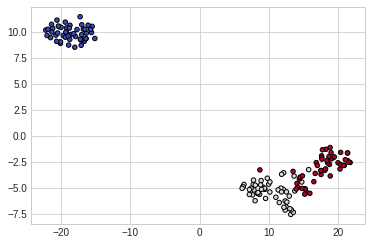

In [36]:
plt.scatter(X_comp[:,0], X_comp[:,1],
            c=y, cmap = plt.cm.coolwarm, s=20, edgecolors = 'k')

In [39]:
model=  KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

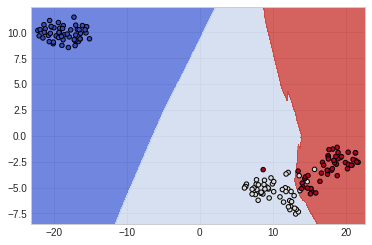

In [46]:
xx, yy = make_meshgrid(X_comp[:,0],X_comp[:,1])
plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors = 'k')

### 유방암 데이터

In [47]:
cancer = load_breast_cancer()


In [49]:
cancer_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df
#특성이 매우 많네?

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [50]:
X,y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.2)

In [51]:
cancer_train_df = pd.DataFrame(data=X_train, columns = cancer.feature_names)
cancer_train_df['target'] = y_train
cancer_train_df
# train데이터의 shape이야

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,14.62,24.02,94.57,662.7,0.08974,0.08606,0.03102,0.02957,0.1685,0.05866,0.3721,1.1110,2.279,33.76,0.004868,0.018180,0.01121,0.008606,0.02085,0.002893,16.11,29.11,102.90,803.7,0.11150,0.17660,0.09189,0.06946,0.2522,0.07246,1
1,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,0.2094,0.7636,1.231,17.67,0.008725,0.020030,0.02335,0.011320,0.02625,0.004726,13.74,19.93,88.81,585.4,0.14830,0.20680,0.22410,0.10560,0.3380,0.09584,1
2,23.09,19.83,152.10,1682.0,0.09342,0.12750,0.16760,0.10030,0.1505,0.05484,1.2910,0.7452,9.635,180.20,0.005753,0.033560,0.03976,0.021560,0.02201,0.002897,30.79,23.87,211.50,2782.0,0.11990,0.36250,0.37940,0.22640,0.2908,0.07277,0
3,11.34,21.26,72.48,396.5,0.08759,0.06575,0.05133,0.01899,0.1487,0.06529,0.2344,0.9861,1.597,16.41,0.009113,0.015570,0.02443,0.006435,0.01568,0.002477,13.01,29.15,83.99,518.1,0.16990,0.21960,0.31200,0.08278,0.2829,0.08832,1
4,11.89,18.35,77.32,432.2,0.09363,0.11540,0.06636,0.03142,0.1967,0.06314,0.2963,1.5630,2.087,21.46,0.008872,0.041920,0.05946,0.017850,0.02793,0.004775,13.25,27.10,86.20,531.2,0.14050,0.30460,0.28060,0.11380,0.3397,0.08365,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,14.42,16.54,94.15,641.2,0.09751,0.11390,0.08007,0.04223,0.1912,0.06412,0.3491,0.7706,2.677,32.14,0.004577,0.030530,0.03840,0.012430,0.01873,0.003373,16.67,21.51,111.40,862.1,0.12940,0.33710,0.37550,0.14140,0.3053,0.08764,1
451,18.03,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,0.2986,0.5906,1.921,35.77,0.004117,0.015600,0.02975,0.009753,0.01295,0.002436,20.38,22.02,133.30,1292.0,0.12630,0.26660,0.42900,0.15350,0.2842,0.08225,0
452,17.85,13.23,114.60,992.1,0.07838,0.06217,0.04445,0.04178,0.1220,0.05243,0.4834,1.0460,3.163,50.95,0.004369,0.008274,0.01153,0.007437,0.01302,0.001309,19.82,18.42,127.10,1210.0,0.09862,0.09976,0.10480,0.08341,0.1783,0.05871,1
453,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.04819,0.1879,0.05852,0.2877,0.9480,2.171,24.87,0.005332,0.021150,0.01536,0.011870,0.01522,0.002815,16.25,26.19,109.10,809.8,0.13130,0.30300,0.18040,0.14890,0.2962,0.08472,1


In [52]:
cancer_train_df = pd.DataFrame(data=X_test, columns = cancer.feature_names)
cancer_train_df['target'] = y_test
cancer_train_df
# 이번엔 시험 데이터야
# 각각 양이 다르지

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,8.888,14.64,58.79,244.0,0.09783,0.15310,0.086060,0.028720,0.1902,0.08980,0.5262,0.8522,3.168,25.440,0.017210,0.093680,0.056710,0.017660,0.02541,0.021930,9.733,15.67,62.56,284.4,0.1207,0.24360,0.14340,0.04786,0.2254,0.10840,1
1,14.270,22.55,93.77,629.8,0.10380,0.11540,0.146300,0.061390,0.1926,0.05982,0.2027,1.8510,1.895,18.540,0.006113,0.025830,0.046450,0.012760,0.01451,0.003756,15.290,34.27,104.30,728.3,0.1380,0.27330,0.42340,0.13620,0.2698,0.08351,0
2,11.840,18.94,75.51,428.0,0.08871,0.06900,0.026690,0.013930,0.1533,0.06057,0.2222,0.8652,1.444,17.120,0.005517,0.017270,0.020450,0.006747,0.01616,0.002922,13.300,24.99,85.22,546.3,0.1280,0.18800,0.14710,0.06913,0.2535,0.07993,1
3,11.040,14.93,70.67,372.7,0.07987,0.07079,0.035460,0.020740,0.2003,0.06246,0.1642,1.0310,1.281,11.680,0.005296,0.019030,0.017230,0.006960,0.01880,0.001941,12.090,20.83,79.73,447.1,0.1095,0.19820,0.15530,0.06754,0.3202,0.07287,1
4,17.290,22.13,114.40,947.8,0.08999,0.12730,0.096970,0.075070,0.2108,0.05464,0.8348,1.6330,6.146,90.940,0.006717,0.059810,0.046380,0.021490,0.02747,0.005838,20.390,27.24,137.90,1295.0,0.1134,0.28670,0.22980,0.15280,0.3067,0.07484,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,12.300,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,0.1539,0.05945,0.1840,1.5320,1.199,13.240,0.007881,0.008432,0.007004,0.006522,0.01939,0.002222,13.350,28.46,84.53,544.3,0.1222,0.09052,0.03619,0.03983,0.2554,0.07207,1
110,17.140,16.40,116.00,912.7,0.11860,0.22760,0.222900,0.140100,0.3040,0.07413,1.0460,0.9760,7.276,111.400,0.008029,0.037990,0.037320,0.023970,0.02308,0.007444,22.250,21.40,152.40,1461.0,0.1545,0.39490,0.38530,0.25500,0.4066,0.10590,0
111,12.420,15.04,78.61,476.5,0.07926,0.03393,0.010530,0.011080,0.1546,0.05754,0.1153,0.6745,0.757,9.006,0.003265,0.004930,0.006493,0.003762,0.01720,0.001360,13.200,20.37,83.85,543.4,0.1037,0.07776,0.06243,0.04052,0.2901,0.06783,1
112,19.400,18.18,127.20,1145.0,0.10370,0.14420,0.162600,0.094640,0.1893,0.05892,0.4709,0.9951,2.903,53.160,0.005654,0.021990,0.030590,0.014990,0.01623,0.001965,23.790,28.65,152.40,1628.0,0.1518,0.37490,0.43160,0.22520,0.3590,0.07787,0


In [58]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)


In [55]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
print('학습 데이터 점수 : {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))
# 나쁘지 않은 성적이구만

학습 데이터 점수 : 0.9406593406593406
평가 데이터 점수 : 0.9473684210526315


In [59]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [60]:
print('학습 데이터 점수 : {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test))) #스케일을 하니까 오히려 안좋아졋구만

학습 데이터 점수 : 0.35824175824175825
평가 데이터 점수 : 0.4298245614035088


In [61]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [62]:
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.0s finished


{'fit_time': array([0.00477791, 0.00405192, 0.00303459, 0.00389743, 0.00313139]),
 'score_time': array([0.01243758, 0.01159596, 0.0117681 , 0.01241064, 0.01177526]),
 'test_score': array([0.96491228, 0.95614035, 0.98245614, 0.95614035, 0.96460177])}

In [67]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsClassifier())]
)

In [77]:
param_grid = [{'model__n_neighbors' : [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm' : ['ball_tree', 'kd_tree','brute']}]

In [78]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [79]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
      

In [80]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=7, p=2,
                                      weights='uniform'))],
         verbose=False)

In [81]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.9701288619779538


In [82]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [83]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['target'] = y
iris_comp_df
# 2차우너으로 2개의 feature만 잇는 형태로 tsne으로 돌림

,0,1,target
0,-33.092068,-8.779515,0
1,-31.191908,-6.810363,0
2,-27.490252,-10.317600,0
3,11.377266,12.575467,0
4,-25.202545,-9.495336,0
...,...,...,...
564,-32.123463,-5.269034,0
565,-27.843697,-9.201556,0
566,-10.476229,-19.209211,0
567,-29.617582,-8.616002,0


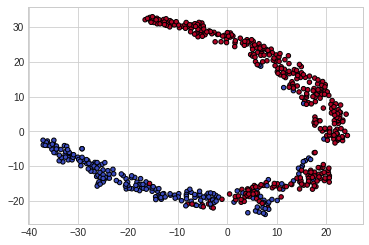

In [84]:
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [85]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

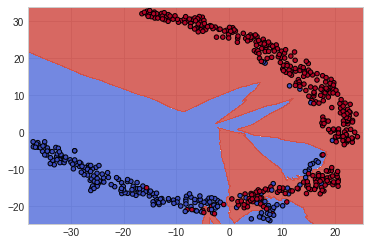

In [86]:
xx,yy =make_meshgrid(X_comp[:,0],X_comp[:,1])
plot_contours(model,xx,yy,cmap = plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

# 와인데이터

In [114]:
wine = load_wine()

In [115]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
wine = pd.DataFrame(data = wine.data, columns = wine.feature_names)
wine_df['target'] =wine.target
wine
#특성이 매우 많네?

In [ ]:
X,y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.2)

In [ ]:
wine_train_df = pd.DataFrame(data=X_test, columns = wine.feature_names)
wine_train_df['target'] = y_train
wine_train_df 

In [ ]:
wine_test_df = pd.DataFrame(data=X_test, columns = wine.feature_names)
wine_test_df['target'] = y_test
wine_test_df

In [ ]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)


In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

In [ ]:
print('학습 데이터 점수 : {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train_scale, y_train)

In [ ]:
print('학습 데이터 점수 : {}'.format(model.score(X_train,y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

In [ ]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

In [ ]:
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

In [ ]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsClassifier())]
)

In [ ]:
param_grid = [{'model__n_neighbors' : [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm' : ['ball_tree', 'kd_tree','brute']}]

In [ ]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [ ]:
gs.fit(X,y)

In [ ]:
gs.best_estimator_

In [ ]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

In [ ]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [ ]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['target'] = y
iris_comp_df

In [ ]:
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [ ]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

In [ ]:
xx,yy =make_meshgrid(X_comp[:,0],X_comp[:,1])
plot_contours(model,xx,yy,cmap = plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:,0], X_comp[:,1], c=y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 보스턴 주택 가격 데이터

In [125]:
boston = load_boston()


In [126]:
boston_df = pd.DataFrame(data  = boston.data, columns = boston.feature_names)
boston_df['TARGET'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [128]:
X,y = boston.data, boston.target
X_train, X_test , y_train,y_test = train_test_split(X,y ,test_size = 0.2)

In [130]:
boston_train_df = pd.DataFrame(data=X_train, columns = boston.feature_names)
boston_train_df['target'] = y_train
boston_train_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
1,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96,18.1
2,0.33983,22.0,5.86,0.0,0.431,6.108,34.9,8.0555,7.0,330.0,19.1,390.18,9.16,24.3
3,0.04297,52.5,5.32,0.0,0.405,6.565,22.9,7.3172,6.0,293.0,16.6,371.72,9.51,24.8
4,3.83684,0.0,18.10,0.0,0.770,6.251,91.1,2.2955,24.0,666.0,20.2,350.65,14.19,19.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,12.24720,0.0,18.10,0.0,0.584,5.837,59.7,1.9976,24.0,666.0,20.2,24.65,15.69,10.2
400,0.28955,0.0,10.59,0.0,0.489,5.412,9.8,3.5875,4.0,277.0,18.6,348.93,29.55,23.7
401,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38,22.0
402,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3


In [131]:
boston_test_df = pd.DataFrame(data=X_test, columns = boston.feature_names)
boston_test_df['target'] = y_test
boston_test_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24.0,666.0,20.2,374.68,11.66,29.8
1,6.96215,0.0,18.10,0.0,0.700,5.713,97.0,1.9265,24.0,666.0,20.2,394.43,17.11,15.1
2,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30,19.2
3,5.20177,0.0,18.10,1.0,0.770,6.127,83.4,2.7227,24.0,666.0,20.2,395.43,11.48,22.7
4,7.40389,0.0,18.10,0.0,0.597,5.617,97.9,1.4547,24.0,666.0,20.2,314.64,26.40,17.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.35114,0.0,7.38,0.0,0.493,6.041,49.9,4.7211,5.0,287.0,19.6,396.90,7.70,20.4
98,12.80230,0.0,18.10,0.0,0.740,5.854,96.6,1.8956,24.0,666.0,20.2,240.52,23.79,10.8
99,6.39312,0.0,18.10,0.0,0.584,6.162,97.4,2.2060,24.0,666.0,20.2,302.76,24.10,13.3
100,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6


In [148]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [149]:
model =KNeighborsRegressor()
model.fit(X_train,y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [150]:
print('학습 데이터 점수 : {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test, y_test)))

학습 데이터 점수 : 0.6994807083214507
평가 데이터 점수 : 0.5905067692172239


In [153]:
model = KNeighborsRegressor()
model.fit(X_train_scale, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [154]:
print('학습 데이터 점수 : {}'.format(model.score(X_train_scale, y_train)))
print('평가 데이터 점수 : {}'.format(model.score(X_test_scale, y_test)))

학습 데이터 점수 : 0.8371523592944878
평가 데이터 점수 : 0.815453725330452


In [157]:
estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

In [158]:
cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv =5,
    n_jobs=multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00571632, 0.00858402, 0.00285459, 0.00306273, 0.00233459]),
 'score_time': array([0.0031724 , 0.00435734, 0.00639582, 0.00477791, 0.0018568 ]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [160]:
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsRegressor())]
)

In [161]:
param_grid = [{'model__n_neighbors' : [3,5,7],
               'model__weights': ['uniform', 'distance'],
               'model__algorithm' : ['ball_tree', 'kd_tree','brute']}]

In [162]:
gs = GridSearchCV(
    estimator = pipe,
    param_grid=param_grid,
    n_jobs=multiprocessing.cpu_count(),
    verbose=True
)

In [163]:
gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        KNeighborsRegressor(algorithm='auto',
                                                            leaf_size=30,
                                                            metric='minkowski',
                                                            metric_params=None,
                                                            n_jobs=None,
                                                            n_neighbors=5, p=2,
                                                            weights='uniform'))],
                                verbose=False),
             

In [164]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 KNeighborsRegressor(algorithm='ball_tree', leaf_size=30,
                                     metric='minkowski', metric_params=None,
                                     n_jobs=None, n_neighbors=7, p=2,
                                     weights='distance'))],
         verbose=False)

In [165]:
print('GridSearchCV best score: {}'.format(gs.best_score_))

GridSearchCV best score: 0.4973060611762845


In [171]:
tsne = TSNE(n_components=1)
X_comp = tsne.fit_transform(X)# 예측이니까 1로 해야지

In [172]:
boston_comp_df = pd.DataFrame(data=X_comp)
boston_comp_df['target'] = y
boston_comp_df

,0,target
0,-24.389029,24.0
1,-44.855846,21.6
2,-41.099232,34.7
3,-42.034252,33.4
4,-42.291718,36.2
...,...,...
501,-27.026846,22.4
502,-27.667610,20.6
503,-28.446898,23.9
504,-28.402712,22.0


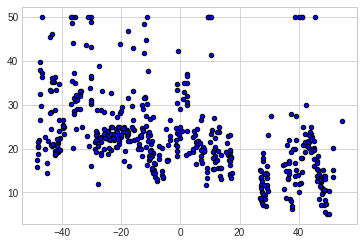

In [173]:
plt.scatter(X_comp, y, c= 'b', cmap = plt.cm.coolwarm, s=20, edgecolors='k')

In [174]:
model = KNeighborsRegressor()
model.fit(X_comp, y)
predict = model.predict(X_comp)

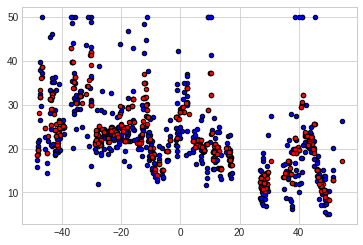

In [175]:

plt.scatter(X_comp, y, c= 'b', cmap = plt.cm.coolwarm, s=20, edgecolors='k')
plt.scatter(X_comp, predict, c= 'r', cmap = plt.cm.coolwarm, s=20, edgecolors='k')

### 캘리포니아 주택 가격 데이터